In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/exercise

/content/drive/MyDrive/exercise


In [3]:
!pip install kmodes
!pip install kneed
!pip install xlrd
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

# Merge Monthly Data
* 월 단위로 수집되며 CSV 파일로 관리됨
* 2021년 1월 ~ 2021년 12월까지 데이터 병합 : 2021년 통합 데이터 생성

In [5]:

# Data의 Raw 폴더에서 측정별 운동 처방 데이터와, 항목별 측정 데이터를 각각 mvm_list, item_list에 불러와 mvm_df, item_df로 병합
dir_path = "./raw_data/total/"
month_list = []
for (root, _, files) in os.walk(dir_path):
    for file in files:
      if 'FTNESS_MESURE_MVN' in file:
          month_list.append(pd.read_csv(root+file))

item_concat = pd.concat(month_list, ignore_index=True)

In [6]:
print(f'체력 측정별 운동처방 dataframe size: {item_concat.shape}')
print(f'체력 측정별 운동처방 데이터 칼럼명: {item_concat.columns.values}')
item_concat.head()

체력 측정별 운동처방 dataframe size: (161820, 51)
체력 측정별 운동처방 데이터 칼럼명: ['MBER_SEQ_NO_VALUE' 'MESURE_SEQ_NO' 'CNTER_NM' 'AGRDE_FLAG_NM'
 'MESURE_PLACE_FLAG_NM' 'MESURE_AGE_CO' 'INPT_FLAG_NM' 'CRTFC_FLAG_NM'
 'MESURE_DE' 'SEXDSTN_FLAG_CD' 'MESURE_IEM_001_VALUE'
 'MESURE_IEM_002_VALUE' 'MESURE_IEM_003_VALUE' 'MESURE_IEM_004_VALUE'
 'MESURE_IEM_005_VALUE' 'MESURE_IEM_006_VALUE' 'MESURE_IEM_007_VALUE'
 'MESURE_IEM_008_VALUE' 'MESURE_IEM_009_VALUE' 'MESURE_IEM_010_VALUE'
 'MESURE_IEM_012_VALUE' 'MESURE_IEM_013_VALUE' 'MESURE_IEM_014_VALUE'
 'MESURE_IEM_015_VALUE' 'MESURE_IEM_016_VALUE' 'MESURE_IEM_017_VALUE'
 'MESURE_IEM_018_VALUE' 'MESURE_IEM_019_VALUE' 'MESURE_IEM_020_VALUE'
 'MESURE_IEM_021_VALUE' 'MESURE_IEM_022_VALUE' 'MESURE_IEM_023_VALUE'
 'MESURE_IEM_024_VALUE' 'MESURE_IEM_025_VALUE' 'MESURE_IEM_026_VALUE'
 'MESURE_IEM_027_VALUE' 'MESURE_IEM_028_VALUE' 'MESURE_IEM_029_VALUE'
 'MESURE_IEM_030_VALUE' 'MESURE_IEM_031_VALUE' 'MESURE_IEM_032_VALUE'
 'MESURE_IEM_033_VALUE' 'MESURE_IEM_034_VALUE' 'M

,MBER_SEQ_NO_VALUE,MESURE_SEQ_NO,CNTER_NM,AGRDE_FLAG_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,INPT_FLAG_NM,CRTFC_FLAG_NM,MESURE_DE,SEXDSTN_FLAG_CD,...,MESURE_IEM_033_VALUE,MESURE_IEM_034_VALUE,MESURE_IEM_035_VALUE,MESURE_IEM_036_VALUE,MESURE_IEM_037_VALUE,MESURE_IEM_038_VALUE,MESURE_IEM_039_VALUE,MESURE_IEM_040_VALUE,MESURE_IEM_041_VALUE,MVM_PRSCRPTN_CN
0,AAGsokWGtfWDralZnocqsACD,1,보은,청소년,일반,13.0,관리자,2등급,20210201,F,...,NaN,NaN,NaN,121.0,39.9,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."
1,AAH6qbncuyGGmYwajlpXqZEb,1,보은,청소년,일반,15.0,관리자,참가증,20210201,F,...,NaN,NaN,NaN,141.0,36.2,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."
2,AAG7/PvANuMQ2WfGpF+Rvglc,1,보은,청소년,일반,13.0,관리자,2등급,20210201,F,...,NaN,NaN,NaN,137.0,37.4,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."
3,AAEzuIfjJR07A5CfZNm1eqgF,1,포항,노인,일반,70.0,인바디,참가증,20210201,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"준비운동:목 스트레칭,등/어깨 뒤쪽 스트레칭,어깨 뒤쪽 스트레칭,아래 팔 스트레칭,..."
4,AAGC0y2sxl4yNFjuRATXp08F,1,KSPO광주(출장),성인,일반,56.0,관리자,3등급,20210201,F,...,155.0,NaN,30.9,NaN,NaN,NaN,NaN,0.393,NaN,"준비운동:목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,아래 팔 스트..."


In [7]:
item_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161820 entries, 0 to 161819
Data columns (total 51 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MBER_SEQ_NO_VALUE     161820 non-null  object 
 1   MESURE_SEQ_NO         161820 non-null  int64  
 2   CNTER_NM              161820 non-null  object 
 3   AGRDE_FLAG_NM         161820 non-null  object 
 4   MESURE_PLACE_FLAG_NM  161820 non-null  object 
 5   MESURE_AGE_CO         161813 non-null  float64
 6   INPT_FLAG_NM          161820 non-null  object 
 7   CRTFC_FLAG_NM         161820 non-null  object 
 8   MESURE_DE             161820 non-null  int64  
 9   SEXDSTN_FLAG_CD       161820 non-null  object 
 10  MESURE_IEM_001_VALUE  161817 non-null  float64
 11  MESURE_IEM_002_VALUE  161808 non-null  float64
 12  MESURE_IEM_003_VALUE  151855 non-null  float64
 13  MESURE_IEM_004_VALUE  91841 non-null   float64
 14  MESURE_IEM_005_VALUE  161813 non-null  float64
 15  

# 칼럼명 처리

In [8]:
# load 체력측정 항목별 측정 데이터 칼럼 정의서 파일
xlsx = pd.read_excel(dir_path+'체력측정 및 운동처방 종합 데이터_컬럼정의서.xls')
xlsx.to_csv(dir_path+"체력측정 및 운동처방 종합 데이터_컬럼정의서.csv")

In [9]:

# 체력측정 항목별 측정 데이터
# 데이터 칼럼영문명을 컬럼한글명과 매칭 
# 컬럼한글명에 여러 측정 결과 칼럼명 앞에 불필요하게 공통적으로 붙은 "측정항목값 :" 제거 
item_column_df = pd.read_csv(dir_path+'체력측정 및 운동처방 종합 데이터_컬럼정의서.csv')[['컬럼영문명','컬럼한글명']]
item_column_df['컬럼한글명'] = item_column_df['컬럼한글명'].apply(lambda x : x.replace('측정항목_',''))
item_column_df['컬럼한글명'] = item_column_df['컬럼한글명'].apply(lambda x : x.replace('\n',''))
item_column_df=item_column_df.T

In [10]:
data = item_concat.values.tolist()
kor_col = item_column_df.loc["컬럼한글명"].values.tolist()
eng_col = item_column_df.loc["컬럼영문명"].values.tolist()

In [11]:
# 데이터 컬럼명 한글 데이터 프레임
item_concat_kor = pd.DataFrame(data,columns=kor_col)
item_concat_kor.head(3)

,회원일련번호값,측정일련번호,센터명,연령대구분명,측정장소구분명,측정연령수,입력구분명,인증구분명,측정일자,성별구분코드,...,33값 : 트레드밀_6분(bpm),34값 : 트레드밀_9분(bpm),35값 : 트레드밀출력(VO₂max),36값 : 스텝검사_회복시 심박수(bpm),37값 : 스텝검사출력(VO₂max),38값 : 허벅지_좌(cm),39값 : 허벅지_우(cm),40값 : 전신반응(초),41값 : 체공시간2(초),운동처방내용
0,AAGsokWGtfWDralZnocqsACD,1,보은,청소년,일반,13.0,관리자,2등급,20210201,F,...,NaN,NaN,NaN,121.0,39.9,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."
1,AAH6qbncuyGGmYwajlpXqZEb,1,보은,청소년,일반,15.0,관리자,참가증,20210201,F,...,NaN,NaN,NaN,141.0,36.2,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."
2,AAG7/PvANuMQ2WfGpF+Rvglc,1,보은,청소년,일반,13.0,관리자,2등급,20210201,F,...,NaN,NaN,NaN,137.0,37.4,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."


In [12]:
item_concat_eng = pd.DataFrame(data,columns=eng_col)
item_concat_eng.head(3)

,MBER_SEQ_NO_VALUE,MESURE_SEQ_NO,CNTER_NM,AGRDE_FLAG_NM,MESURE_PLACE_FLAG_NM,MESURE_AGE_CO,INPT_FLAG_NM,CRTFC_FLAG_NM,MESURE_DE,SEXDSTN_FLAG_CD,...,MESURE_IEM_033_VALUE,MESURE_IEM_034_VALUE,MESURE_IEM_035_VALUE,MESURE_IEM_036_VALUE,MESURE_IEM_037_VALUE,MESURE_IEM_038_VALUE,MESURE_IEM_039_VALUE,MESURE_IEM_040_VALUE,MESURE_IEM_041_VALUE,MVM_PRSCRPTN_CN
0,AAGsokWGtfWDralZnocqsACD,1,보은,청소년,일반,13.0,관리자,2등급,20210201,F,...,NaN,NaN,NaN,121.0,39.9,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."
1,AAH6qbncuyGGmYwajlpXqZEb,1,보은,청소년,일반,15.0,관리자,참가증,20210201,F,...,NaN,NaN,NaN,141.0,36.2,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."
2,AAG7/PvANuMQ2WfGpF+Rvglc,1,보은,청소년,일반,13.0,관리자,2등급,20210201,F,...,NaN,NaN,NaN,137.0,37.4,NaN,NaN,NaN,NaN,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:조깅,윗몸 일으키기,엎드려 팔다리 교..."


In [13]:
# 체력측정 항목별 측정 데이터 결측치 갯수와 대략적인 차지 비율 확인
def getNullPercent(item):
  for column in item.columns:
    percent = round(item[column].isnull().sum()/item.shape[0],2)*100
    print(f"{column}: {item[column].isnull().sum()}개 ({percent}%)")
    #if percent > 30: # 특정 비율 이상 칼럼 출력
    #  print(f"{column}: {item[column].isnull().sum()}개 ({percent}%)")

https://scienceon.kisti.re.kr/commons/util/originalView.do?cn=TRKO201900004661&dbt=TRKO&rn=

https://nfa.kspo.or.kr/front/certify/cer0101_list.do

https://nfa.kspo.or.kr/front/certify/cer0102_list.do
* 평가 등급

각 종목별 수치를 기록하여 각 종목마다 등급이 매겨진다. 등급은 1등급, 2등급, 3등급, 등급 외 4가지로 나뉘며, 각 등급별 설명은 다음과 같다.
* 1등급 : 신체조성을 제외하고 건강관련 체력검사항목이 모두 70백분위 이상이며 운동관련 체력검사항목 중 한 가지가 70백분위 이상
* 2등급 : 신체조성을 제외하고 건강관련 체력검사항목이 모두 50백분위 이상이며 운동관련 체력검사항목 중 한 가지가 50백분위 이상
* 3등급 : 신체조성이 권장 범위에 있으며 나머지 건강관련 4개 체력검사 항목이 모두 30백분위 이상
* 등급 외 : 신체조성이 권장 범위 외거나 나머지 건강관련 4개 체력검사 항목에서 30백분위 기준에 들지 못함

http://ebook.culturestat.mcst.go.kr/src/viewer/main.php?host=main&site=20210205_185442

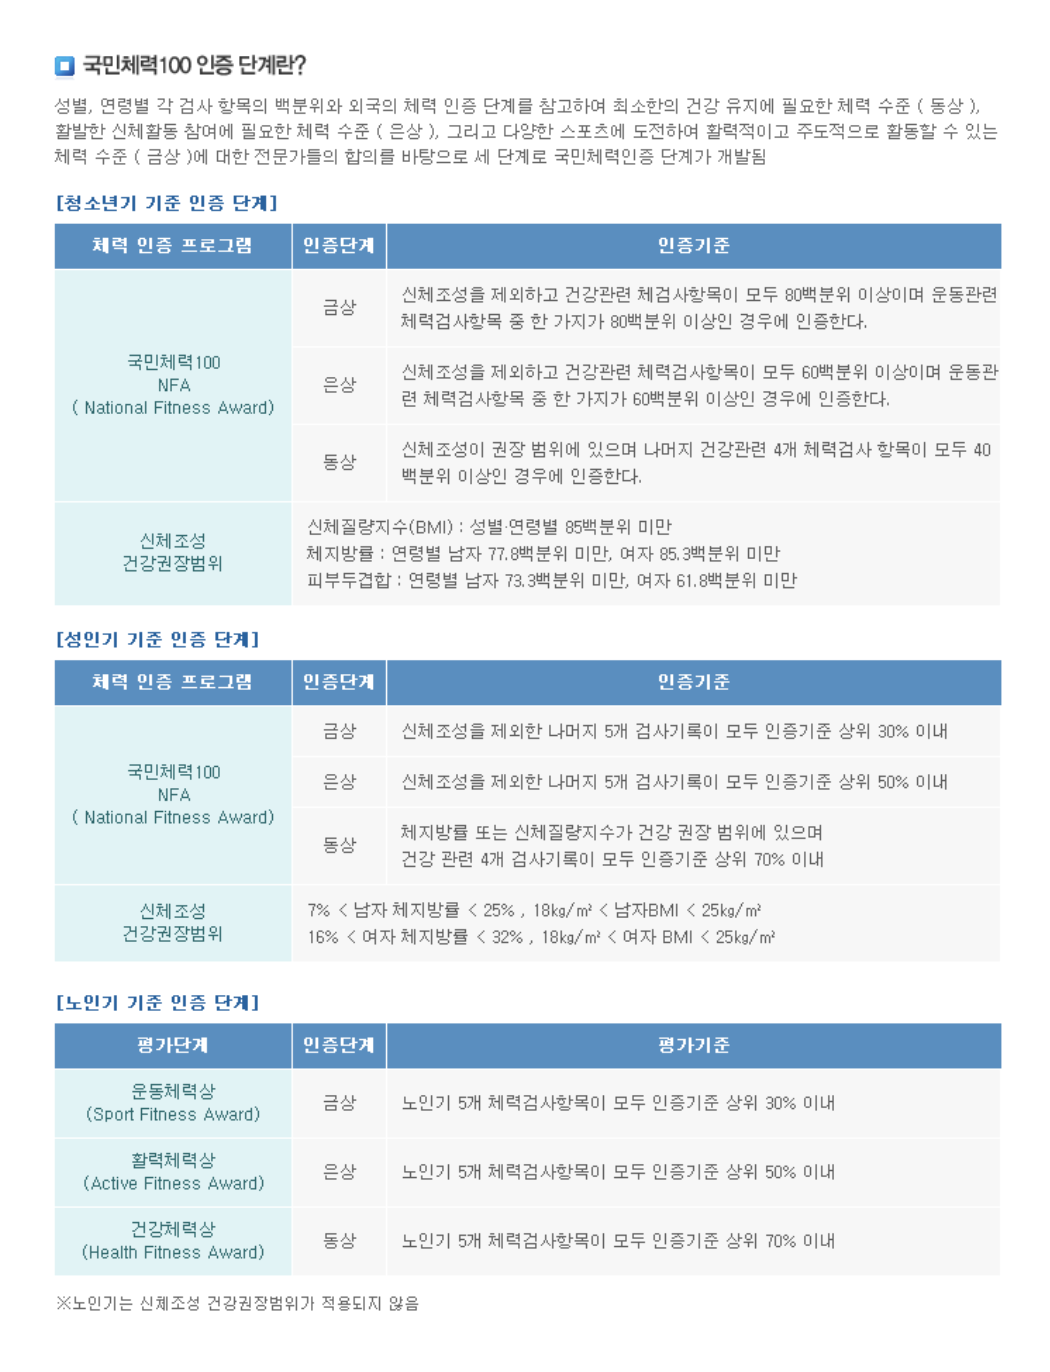

In [14]:
youth_df=item_concat_kor[item_concat_kor['연령대구분명'] == '유소년']
print(f'체력 측정별 운동처방 dataframe size: {youth_df.shape}')
getNullPercent(youth_df)

체력 측정별 운동처방 dataframe size: (9835, 51)
회원일련번호값: 0개 (0.0%)
측정일련번호: 0개 (0.0%)
센터명: 0개 (0.0%)
연령대구분명: 0개 (0.0%)
측정장소구분명: 0개 (0.0%)
측정연령수: 0개 (0.0%)
입력구분명: 0개 (0.0%)
인증구분명: 0개 (0.0%)
측정일자: 0개 (0.0%)
성별구분코드: 0개 (0.0%)
1값 : 신장(cm): 1개 (0.0%)
2값 : 체중(kg): 3개 (0.0%)
3값 : 체지방율(%): 9835개 (100.0%)
4값 : 허리둘레(cm): 366개 (4.0%)
5값 : 이완기최저혈압(mmHg): 0개 (0.0%)
6값 : 수축기최고혈압(mmHg): 0개 (0.0%)
7값 : 악력_좌(kg): 22개 (0.0%)
8값 : 악력_우(kg): 21개 (0.0%)
9값 : 윗몸말아올리기(회): 102개 (1.0%)
10값 : 반복점프(회): 9835개 (100.0%)
12값 : 앉아윗몸앞으로굽히기(cm): 21개 (0.0%)
13값 : 일리노이(초): 9835개 (100.0%)
14값 : 체공시간(초): 9835개 (100.0%)
15값 : 협응력시간(초): 9835개 (100.0%)
16값 : 협응력실수횟수(회): 9835개 (100.0%)
17값 : 협응력계산결과값(초): 9835개 (100.0%)
18값 : BMI(kg/㎡): 0개 (0.0%)
19값 : 교차윗몸일으키기(회): 9835개 (100.0%)
20값 : 왕복오래달리기(회): 4795개 (49.0%)
21값 : 10M 4회 왕복달리기(초): 9835개 (100.0%)
22값 : 제자리 멀리뛰기(cm): 73개 (1.0%)
23값 : 의자에앉았다일어서기(회): 9835개 (100.0%)
24값 : 6분걷기(m): 9835개 (100.0%)
25값 : 2분제자리걷기(회): 9835개 (100.0%)
26값 : 의자에앉아 3M표적 돌아오기(초): 9835개 (100.0%)
27값 : 8자보행(초): 9835개 

In [15]:
teen_df=item_concat_kor[item_concat_kor['연령대구분명'] == '청소년']
print(f'체력 측정별 운동처방 dataframe size: {teen_df.shape}')
getNullPercent(teen_df)

체력 측정별 운동처방 dataframe size: (69069, 51)
회원일련번호값: 0개 (0.0%)
측정일련번호: 0개 (0.0%)
센터명: 0개 (0.0%)
연령대구분명: 0개 (0.0%)
측정장소구분명: 0개 (0.0%)
측정연령수: 0개 (0.0%)
입력구분명: 0개 (0.0%)
인증구분명: 0개 (0.0%)
측정일자: 0개 (0.0%)
성별구분코드: 0개 (0.0%)
1값 : 신장(cm): 0개 (0.0%)
2값 : 체중(kg): 6개 (0.0%)
3값 : 체지방율(%): 69개 (0.0%)
4값 : 허리둘레(cm): 41007개 (59.0%)
5값 : 이완기최저혈압(mmHg): 0개 (0.0%)
6값 : 수축기최고혈압(mmHg): 2개 (0.0%)
7값 : 악력_좌(kg): 187개 (0.0%)
8값 : 악력_우(kg): 161개 (0.0%)
9값 : 윗몸말아올리기(회): 44209개 (64.0%)
10값 : 반복점프(회): 27454개 (40.0%)
12값 : 앉아윗몸앞으로굽히기(cm): 249개 (0.0%)
13값 : 일리노이(초): 5503개 (8.0%)
14값 : 체공시간(초): 6846개 (10.0%)
15값 : 협응력시간(초): 5696개 (8.0%)
16값 : 협응력실수횟수(회): 5706개 (8.0%)
17값 : 협응력계산결과값(초): 5694개 (8.0%)
18값 : BMI(kg/㎡): 0개 (0.0%)
19값 : 교차윗몸일으키기(회): 69069개 (100.0%)
20값 : 왕복오래달리기(회): 32288개 (47.0%)
21값 : 10M 4회 왕복달리기(초): 69069개 (100.0%)
22값 : 제자리 멀리뛰기(cm): 23006개 (33.0%)
23값 : 의자에앉았다일어서기(회): 69069개 (100.0%)
24값 : 6분걷기(m): 69069개 (100.0%)
25값 : 2분제자리걷기(회): 69069개 (100.0%)
26값 : 의자에앉아 3M표적 돌아오기(초): 69069개 (100.0%)
27값 : 8자보행(초)

In [16]:
adult_df = item_concat_kor[item_concat_kor['연령대구분명'] == '성인']
print(f'체력 측정별 운동처방 dataframe size: {adult_df.shape}')
getNullPercent(adult_df)

체력 측정별 운동처방 dataframe size: (71208, 51)
회원일련번호값: 0개 (0.0%)
측정일련번호: 0개 (0.0%)
센터명: 0개 (0.0%)
연령대구분명: 0개 (0.0%)
측정장소구분명: 0개 (0.0%)
측정연령수: 6개 (0.0%)
입력구분명: 0개 (0.0%)
인증구분명: 0개 (0.0%)
측정일자: 0개 (0.0%)
성별구분코드: 0개 (0.0%)
1값 : 신장(cm): 2개 (0.0%)
2값 : 체중(kg): 3개 (0.0%)
3값 : 체지방율(%): 55개 (0.0%)
4값 : 허리둘레(cm): 24408개 (34.0%)
5값 : 이완기최저혈압(mmHg): 4개 (0.0%)
6값 : 수축기최고혈압(mmHg): 6개 (0.0%)
7값 : 악력_좌(kg): 555개 (1.0%)
8값 : 악력_우(kg): 515개 (1.0%)
9값 : 윗몸말아올리기(회): 71208개 (100.0%)
10값 : 반복점프(회): 71208개 (100.0%)
12값 : 앉아윗몸앞으로굽히기(cm): 525개 (1.0%)
13값 : 일리노이(초): 71208개 (100.0%)
14값 : 체공시간(초): 71208개 (100.0%)
15값 : 협응력시간(초): 71208개 (100.0%)
16값 : 협응력실수횟수(회): 71208개 (100.0%)
17값 : 협응력계산결과값(초): 71208개 (100.0%)
18값 : BMI(kg/㎡): 0개 (0.0%)
19값 : 교차윗몸일으키기(회): 982개 (1.0%)
20값 : 왕복오래달리기(회): 66116개 (93.0%)
21값 : 10M 4회 왕복달리기(초): 67180개 (94.0%)
22값 : 제자리 멀리뛰기(cm): 9159개 (13.0%)
23값 : 의자에앉았다일어서기(회): 71208개 (100.0%)
24값 : 6분걷기(m): 71208개 (100.0%)
25값 : 2분제자리걷기(회): 71208개 (100.0%)
26값 : 의자에앉아 3M표적 돌아오기(초): 71208개 (100.0%)
27값

In [17]:
senior_df=item_concat_kor[item_concat_kor['연령대구분명'] == '노인']
print(f'체력 측정별 운동처방 dataframe size: {senior_df.shape}')
getNullPercent(senior_df)

체력 측정별 운동처방 dataframe size: (11708, 51)
회원일련번호값: 0개 (0.0%)
측정일련번호: 0개 (0.0%)
센터명: 0개 (0.0%)
연령대구분명: 0개 (0.0%)
측정장소구분명: 0개 (0.0%)
측정연령수: 1개 (0.0%)
입력구분명: 0개 (0.0%)
인증구분명: 0개 (0.0%)
측정일자: 0개 (0.0%)
성별구분코드: 0개 (0.0%)
1값 : 신장(cm): 0개 (0.0%)
2값 : 체중(kg): 0개 (0.0%)
3값 : 체지방율(%): 6개 (0.0%)
4값 : 허리둘레(cm): 4198개 (36.0%)
5값 : 이완기최저혈압(mmHg): 3개 (0.0%)
6값 : 수축기최고혈압(mmHg): 4개 (0.0%)
7값 : 악력_좌(kg): 57개 (0.0%)
8값 : 악력_우(kg): 47개 (0.0%)
9값 : 윗몸말아올리기(회): 11708개 (100.0%)
10값 : 반복점프(회): 11708개 (100.0%)
12값 : 앉아윗몸앞으로굽히기(cm): 73개 (1.0%)
13값 : 일리노이(초): 11708개 (100.0%)
14값 : 체공시간(초): 11708개 (100.0%)
15값 : 협응력시간(초): 11708개 (100.0%)
16값 : 협응력실수횟수(회): 11708개 (100.0%)
17값 : 협응력계산결과값(초): 11708개 (100.0%)
18값 : BMI(kg/㎡): 0개 (0.0%)
19값 : 교차윗몸일으키기(회): 11708개 (100.0%)
20값 : 왕복오래달리기(회): 11708개 (100.0%)
21값 : 10M 4회 왕복달리기(초): 11708개 (100.0%)
22값 : 제자리 멀리뛰기(cm): 11708개 (100.0%)
23값 : 의자에앉았다일어서기(회): 277개 (2.0%)
24값 : 6분걷기(m): 11539개 (99.0%)
25값 : 2분제자리걷기(회): 767개 (7.000000000000001%)
26값 : 의자에앉아 3M표적 돌아오기(초): 455개 (4.0%)

## Split Exercise 
* Pre exercise
* Main exercise
* Finish exercise

In [19]:
adult_df.dropna(subset=["운동처방내용"],inplace=True)
#adult_df.head(3)

In [20]:
# 해당 칼럼에 null 값 있으면 람다 split 안 됨
adult_df['split'] = adult_df['운동처방내용'].apply(lambda x : x.split(' / '))
to_list_df = adult_df.drop('운동처방내용',axis=1)

In [22]:
# 운동 개수 열 생성
to_list_df['len_ex'] = to_list_df.apply(lambda x : len(x['split']), axis=1) 

In [24]:
# 운동 개수가 3인 행만 필터링
filter_df = to_list_df.loc[to_list_df['len_ex']==3].copy().drop('len_ex',axis=1).reset_index(drop=True) 

In [26]:
# input : DataFrame, remove keyword
# return : Series

def split_col(df, keyword): # keyword : 준비운동, 본운동, 마무리운동
    index =  0 if keyword == '준비운동' else 1 if keyword == '본운동' else 2 if keyword =='마무리운동' else -1
    if index == -1:
        raise NameError('준비운동, 본운동, 마무리운동 이외의 값이 입력됐습니다.') 
    return df['split'].apply(lambda x : x[index].replace(keyword+':','')).copy()

In [27]:
# 컬럼 분리
pre_ex_col = split_col(filter_df, '준비운동')
main_ex_col = split_col(filter_df, '본운동')
finish_ex_col = split_col(filter_df, '마무리운동')

# 컬럼 명 변경
pre_ex_col.name = '준비 운동'
main_ex_col.name = '본 운동'
finish_ex_col.name = '마무리 운동'

In [28]:
pre_ex_col

0                                     전신 루틴 스트레칭,트레드밀에서 걷기
1                         점프 후 버티기,사이드 스텝 점프하기,빠르게 앞무릎 올리기
2                                        걷기,동적 스트레칭 루틴프로그램
3                         트레드밀에서 걷기,상지 루틴 스트레칭,하지 루틴 스트레칭1
4                      실내 자전거타기,트레드밀에서 걷기,줄넘기,계단 올라갔다 내려오기
                               ...                        
35688    하지 루틴 스트레칭1,목 스트레칭,가슴/어깨 앞쪽 스트레칭,좌식생활자를 위한 동적 ...
35689                                      자가근막이완술 루틴 스트레칭
35690                           전신 루틴 스트레칭,자가근막이완술 루틴 스트레칭
35691                                  유산소 운동 전 동적 루틴 스트레칭
35692                                  유산소 운동 전 동적 루틴 스트레칭
Name: 준비 운동, Length: 35693, dtype: object

In [ ]:
adult_df["운동처방내용"]

In [ ]:
adult_df["운동처방내용"].iloc[100]

In [ ]:
adult_df["운동처방내용"].iloc[40]

In [ ]:
adult_df["운동처방내용"].iloc[3000]

In [ ]:
adult_df["운동처방내용"].iloc[3050]